In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\jaiad\OneDrive\Desktop\FuturensePro\Leads Generated.xlsx")

In [3]:
df.head()

,lead_id,created_time,Campaign Name,platform,graduation_degree,graduation_percentage,work_experience,contacted,lsq_lead_stage,lsq_lead_owner,lsq_source
0,l:3587545764833355,2024-05-02 14:18:00,USP_2_Lead-gen-1_220124,Facebook,b.tech_cse,70.0,7,Contacted,Not Interested,Janvi Aggarwal,Facebook
1,cc0da387-682c-4530-a79a-1168487410f0,2024-04-30 18:00:07,USP_Search_APTNTSKA_250124,Google,B.Tech CSE,80.0,3 Years,NaN,NaN,NaN,NaN
2,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,2024-03-21 02:25:55,USP_Video_APTLTSKA_Lead-Gen_Keywords_050324,Google,PG,50.0,1 Year,NaN,Invalid phone number,Ankur chandra,GoogleAds
3,7e0db362-ebc3-4265-9131-d69bae5eb3f5,2024-03-17 06:40:21,USP_Search_APTNTSKA_250124,Google,Others,60.0,Fresher,NaN,Invalid phone number,Chitwan Soni,GoogleAds
4,5f74bcc1-08a8-414d-a729-69d5071b4f53,2024-03-20 07:48:39,USP_Video_APTLTSKA_Lead-Gen_Websites_050324,Google,UG,100.0,10 Years,NaN,Invalid phone number,Ayush Dixit,GoogleAds


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lead_id                32769 non-null  object        
 1   created_time           32769 non-null  datetime64[ns]
 2   Campaign Name          32722 non-null  object        
 3   platform               32769 non-null  object        
 4   graduation_degree      32763 non-null  object        
 5   graduation_percentage  32764 non-null  float64       
 6   work_experience        32762 non-null  object        
 7   contacted              30805 non-null  object        
 8   lsq_lead_stage         32097 non-null  object        
 9   lsq_lead_owner         32162 non-null  object        
 10  lsq_source             32004 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 2.8+ MB


In [5]:
df.shape

(32769, 11)

CLEANING & HANDLING OF NULL VALUES

In [11]:
df.isnull().sum()

lead_id                     0
created_time                0
Campaign Name              47
platform                    0
graduation_degree           6
graduation_percentage       5
work_experience             7
contacted                1964
lsq_lead_stage            672
lsq_lead_owner            607
lsq_source                765
dtype: int64

In [13]:
df.dtypes

lead_id                          object
created_time             datetime64[ns]
Campaign Name                    object
platform                         object
graduation_degree                object
graduation_percentage           float64
work_experience                  object
contacted                        object
lsq_lead_stage                   object
lsq_lead_owner                   object
lsq_source                       object
dtype: object

In [15]:
df.head()

,lead_id,created_time,Campaign Name,platform,graduation_degree,graduation_percentage,work_experience,contacted,lsq_lead_stage,lsq_lead_owner,lsq_source
0,l:3587545764833355,2024-05-02 14:18:00,USP_2_Lead-gen-1_220124,Facebook,b.tech_cse,70.0,7,Contacted,Not Interested,Janvi Aggarwal,Facebook
1,cc0da387-682c-4530-a79a-1168487410f0,2024-04-30 18:00:07,USP_Search_APTNTSKA_250124,Google,B.Tech CSE,80.0,3 Years,NaN,NaN,NaN,NaN
2,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,2024-03-21 02:25:55,USP_Video_APTLTSKA_Lead-Gen_Keywords_050324,Google,PG,50.0,1 Year,NaN,Invalid phone number,Ankur chandra,GoogleAds
3,7e0db362-ebc3-4265-9131-d69bae5eb3f5,2024-03-17 06:40:21,USP_Search_APTNTSKA_250124,Google,Others,60.0,Fresher,NaN,Invalid phone number,Chitwan Soni,GoogleAds
4,5f74bcc1-08a8-414d-a729-69d5071b4f53,2024-03-20 07:48:39,USP_Video_APTLTSKA_Lead-Gen_Websites_050324,Google,UG,100.0,10 Years,NaN,Invalid phone number,Ayush Dixit,GoogleAds


In [17]:
#Filled with the Nearby values for campaign Name
df['Campaign Name'] = df['Campaign Name'].fillna(method='ffill').fillna(method='bfill')

C:\Users\jaiad\AppData\Local\Temp\ipykernel_6728\2119296837.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Campaign Name'] = df['Campaign Name'].fillna(method='ffill').fillna(method='bfill')


In [19]:
df.isnull().sum()

lead_id                     0
created_time                0
Campaign Name               0
platform                    0
graduation_degree           6
graduation_percentage       5
work_experience             7
contacted                1964
lsq_lead_stage            672
lsq_lead_owner            607
lsq_source                765
dtype: int64

In [21]:
#Mode for graduation degree
mode_graduation_degree = df['graduation_degree'].mode()[0]
df['graduation_degree'].fillna(mode_graduation_degree, inplace=True)

C:\Users\jaiad\AppData\Local\Temp\ipykernel_6728\341829977.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['graduation_degree'].fillna(mode_graduation_degree, inplace=True)


In [23]:
df.isnull().sum()

lead_id                     0
created_time                0
Campaign Name               0
platform                    0
graduation_degree           0
graduation_percentage       5
work_experience             7
contacted                1964
lsq_lead_stage            672
lsq_lead_owner            607
lsq_source                765
dtype: int64

In [25]:
#Mean for graduationpercentage
df['graduation_percentage'].fillna(df['graduation_percentage'].mean(), inplace=True)

C:\Users\jaiad\AppData\Local\Temp\ipykernel_6728\1687571966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['graduation_percentage'].fillna(df['graduation_percentage'].mean(), inplace=True)


In [27]:
#Mode for work_experience
mode_work_experience = df['work_experience'].mode()[0]
df['work_experience'].fillna(mode_work_experience, inplace=True)

C:\Users\jaiad\AppData\Local\Temp\ipykernel_6728\3690492996.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_experience'].fillna(mode_work_experience, inplace=True)


In [29]:
df.isnull().sum()

lead_id                     0
created_time                0
Campaign Name               0
platform                    0
graduation_degree           0
graduation_percentage       0
work_experience             0
contacted                1964
lsq_lead_stage            672
lsq_lead_owner            607
lsq_source                765
dtype: int64

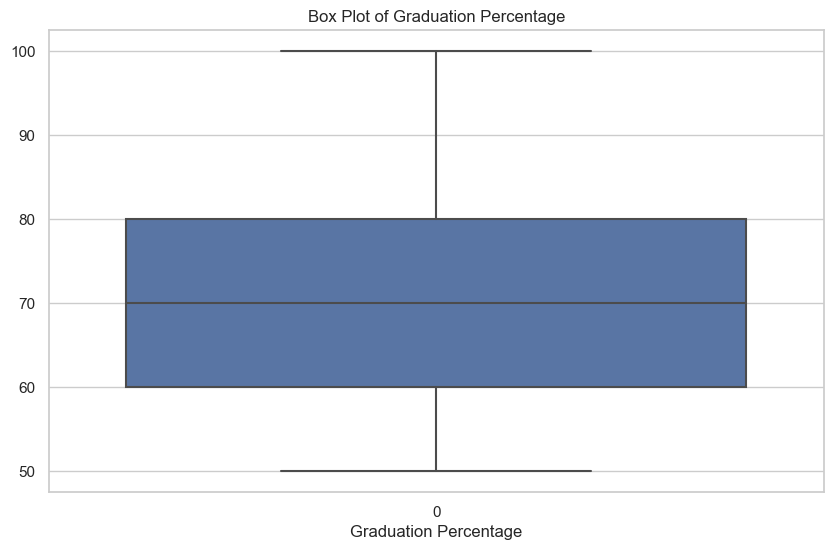

In [31]:
#Checking for outlier in the Graduation ercentage column
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(df['graduation_percentage'])
plt.title('Box Plot of Graduation Percentage')
plt.xlabel('Graduation Percentage')
plt.show()

In [ ]:
#Replaced 
df['lsq_lead_stage'] = df['lsq_lead_stage'].replace('Invalid', 'Invalid phone number')
df['lsq_lead_stage'] = df['lsq_lead_stage'].replace(['Connected/ Not Interested', 'Not Intrested'], 'Cold')

In [35]:
df.head()

,lead_id,created_time,Campaign Name,platform,graduation_degree,graduation_percentage,work_experience,contacted,lsq_lead_stage,lsq_lead_owner,lsq_source
0,l:3587545764833355,2024-05-02 14:18:00,USP_2_Lead-gen-1_220124,Facebook,b.tech_cse,70.0,7,Contacted,Not Interested,Janvi Aggarwal,Facebook
1,cc0da387-682c-4530-a79a-1168487410f0,2024-04-30 18:00:07,USP_Search_APTNTSKA_250124,Google,B.Tech CSE,80.0,3 Years,NaN,NaN,NaN,NaN
2,10045c19-1c8d-4d63-a6bf-62d00a2f50ec,2024-03-21 02:25:55,USP_Video_APTLTSKA_Lead-Gen_Keywords_050324,Google,PG,50.0,1 Year,NaN,Invalid phone number,Ankur chandra,GoogleAds
3,7e0db362-ebc3-4265-9131-d69bae5eb3f5,2024-03-17 06:40:21,USP_Search_APTNTSKA_250124,Google,Others,60.0,Fresher,NaN,Invalid phone number,Chitwan Soni,GoogleAds
4,5f74bcc1-08a8-414d-a729-69d5071b4f53,2024-03-20 07:48:39,USP_Video_APTLTSKA_Lead-Gen_Websites_050324,Google,UG,100.0,10 Years,NaN,Invalid phone number,Ayush Dixit,GoogleAds


In [37]:
#updates the 'contacted' column based on values in the 'lsq_lead_stage' column, marking entries as 'not contacted' if they are 'invalid number', 'invalid', or 'Wrong Number', and 'contacted' otherwise
df['contacted'] = df['lsq_lead_stage'].apply(
    lambda x: 'not contacted' if x in ['Invalid phone number'] else 'contacted'
)

In [39]:
# Fill null values with 'Unknown' in these columns 
df['lsq_lead_stage'] = df['lsq_lead_stage'].fillna('Unknown')
df['lsq_lead_owner']=df['lsq_lead_owner'].fillna('Unknown')
df['lsq_source']=df['lsq_source'].fillna('Unknown')


In [41]:
df.isnull().sum()

lead_id                  0
created_time             0
Campaign Name            0
platform                 0
graduation_degree        0
graduation_percentage    0
work_experience          0
contacted                0
lsq_lead_stage           0
lsq_lead_owner           0
lsq_source               0
dtype: int64

In [120]:
#df.to_excel('Updated_data.xlsx', index=False)

In [43]:
df.isnull().sum()

lead_id                  0
created_time             0
Campaign Name            0
platform                 0
graduation_degree        0
graduation_percentage    0
work_experience          0
contacted                0
lsq_lead_stage           0
lsq_lead_owner           0
lsq_source               0
dtype: int64